In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [30]:
data=pd.read_csv("/content/pima-data.csv")
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [31]:
data.shape

(768, 10)

In [32]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [33]:
data.isnull().values.any()

False

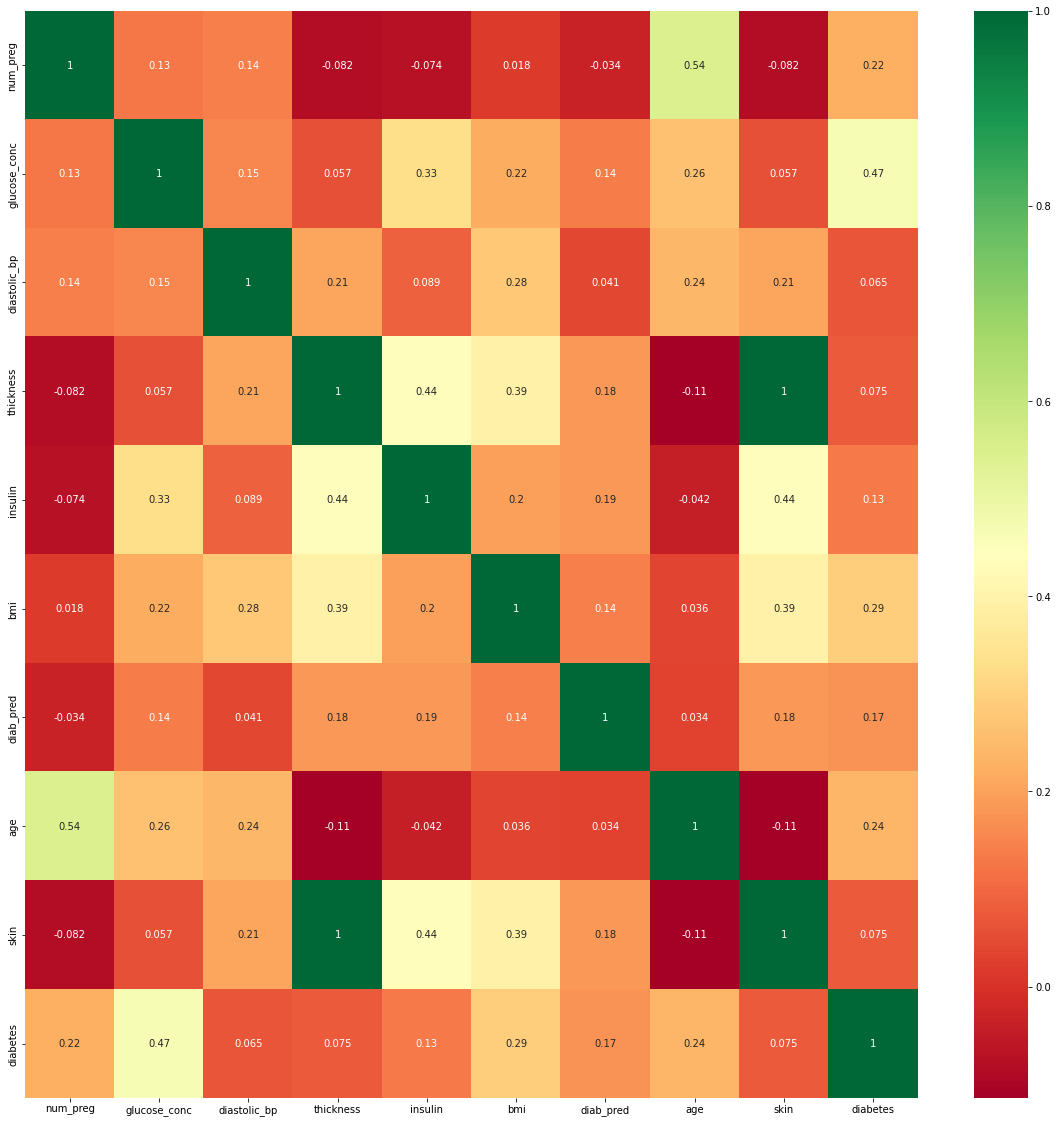

In [34]:
import seaborn as sns
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [35]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [36]:
diabetes_map={True: 1, False: 0}
data['diabetes']

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: diabetes, Length: 768, dtype: bool

In [37]:
data['diabetes']=data['diabetes'].map(diabetes_map)

In [38]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [39]:
diabetes_true_count=len(data.loc[data['diabetes']==True])
diabetes_false_count=len(data.loc[data['diabetes']==False])

In [40]:
diabetes_true_count,diabetes_false_count

(268, 500)

In [41]:
from sklearn.model_selection import train_test_split
features_column=['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age', 'skin']
target_class=['diabetes']
x=data[features_column].values
y=data[target_class].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [42]:
x_train.shape

(537, 9)

In [43]:
print("No of rows :{0}.".format(len(data)))
print("No. of missing rows of glucose_conc :{0}".format(len(data.loc[data['glucose_conc']==0])))
print("No. of missing rows of diastolic_bp : {0}".format(len(data.loc[data['diastolic_bp']==0])))
print("No. of missing rows of thickness : {0}".format(len(data.loc[data['thickness']==0])))
print("No. of missing rows of insulin : {0}".format(len(data.loc[data['insulin']==0])))
print("No. of missing rows of bmi : {0}".format(len(data.loc[data['bmi']==0])))
print("No. of missing rows of diab_pred : {0}".format(len(data.loc[data['diab_pred']==0])))
print("No. of missing rows of age : {0}".format(len(data.loc[data['age']==0])))
print("No. of missing rows of skin : {0}".format(len(data.loc[data['skin']==0])))

No of rows :768.
No. of missing rows of glucose_conc :5
No. of missing rows of diastolic_bp : 35
No. of missing rows of thickness : 227
No. of missing rows of insulin : 374
No. of missing rows of bmi : 11
No. of missing rows of diab_pred : 0
No. of missing rows of age : 0
No. of missing rows of skin : 227


In [44]:
from sklearn.impute import SimpleImputer
fill_values=SimpleImputer(missing_values=0, strategy='mean')
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)


In [46]:
#apply Algo
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(random_state=10)

In [47]:
predict_train_data=random_forest_model.predict(x_test)


In [49]:
from sklearn import metrics
metrics.accuracy_score(y_test,predict_train_data)

0.7532467532467533

In [56]:
import xgboost
classifier=xgboost.XGBClassifier()
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train.ravel(),cv=10)
score

array([0.77777778, 0.81481481, 0.83333333, 0.77777778, 0.77777778,
       0.7037037 , 0.87037037, 0.66037736, 0.75471698, 0.81132075])

In [57]:
score.mean()

0.7781970649895177